# ⚽ WM 2014 – Mini‑Projekt (Messy Data)

Dieses Notebook enthält **nur die Aufgabenstellung** und **Starter‑Zellen** – **keine Lösungen**. 

**Datenbasis:** `worldcup2014.csv` (messy, mit gemischten Datumsformaten, unterschiedlichen Schreibweisen, etc.)

**Ziel:** Übe Datenbereinigung, Feature‑Engineering, Gruppierungen/Analysen, Filtern/Selektieren und Visualisieren.

---

## ▶️ Vorbereitung
- Stelle sicher, dass sich die Datei `worldcup2014.csv` im selben Ordner befindet wie dieses Notebook.
- Du kannst mit VS Code + Jupyter oder jeder anderen Jupyter‑Umgebung arbeiten.


In [35]:
# Starter: Pakete importieren & CSV laden (keine Lösungen)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

CSV_PATH = 'worldcup2014.csv'  # passe ggf. an

# TODO: Datei einlesen (z. B. df = pd.read_csv(CSV_PATH))
df = pd.read_csv(CSV_PATH)

# Erste Sichtprüfung
df.head()

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage
0,1,12-06-2014,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,"62,103",Nishimura Yuichi,Group A
1,2,13/06/2014,Mexico,Cameroon,1,0,Estadio das Dunas,Natal,39.216,Wilmar Roldán,Group A
2,3,13.06.2014,Spain,Netherlands,1,5,Arena Fonte Nova,Salvador,48.173,Nicola Rizzoli,Group B
3,4,14-06-2014,Chile,Australia,3,1,Arena Pantanal,Cuiaba,"40,275",Noumandiez Doue,Group B
4,5,17-06-14,Brazil,Mexico,0,0,Estadio Castelão,Fortaleza,60.342,Cüneyt Çakır,Group A


---
## 1) Datenbereinigung

**Aufgaben:**
1. Standardisiere die Spalte **`Date`** in ein einheitliches Datumsformat (`YYYY-MM-DD`). Die aktuellen Formate sind gemischt (z. B. `12-06-2014`, `13/06/2014`, `2014-06-18`, usw.).
2. Bereinige **`Attendance`**: entferne Punkte/Kommas und konvertiere zu **`int`**.
3. Entferne **überflüssige Leerzeichen** in allen Textspalten (z. B. vor `Referee`).
4. Vereinheitliche **Stadionnamen** (z. B. `Estadio` ➜ `Estádio`).

> **Hinweis:** Du kannst `pd.to_datetime(..., errors='coerce')`, `str.replace`, `str.strip`, `applymap` für Strings usw. verwenden.


In [2]:
#df["Date"] = pd.to_datetime(df["Date"], format=mixed)

df["Date"] = pd.to_datetime(df["Date"], format="mixed") # weil mixed wohl ein string ist müssen anführungsstriche hin Param. fragen?!

In [3]:
df['Attendance'] = df.loc[::1,['Attendance']].replace({',': ''}, regex=True).astype(object)

In [4]:
# TODO: 1) Datenbereinigung hier umsetzen
# - Date normalisieren
# - Attendance numerisch machen
# - Whitespace trimmen
# - Stadium-Schreibweisen vereinheitlichen

df

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage
0,1,2014-12-06,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,62103,Nishimura Yuichi,Group A
1,2,2014-06-13,Mexico,Cameroon,1,0,Estadio das Dunas,Natal,39.216,Wilmar Roldán,Group A
2,3,2014-06-13,Spain,Netherlands,1,5,Arena Fonte Nova,Salvador,48.173,Nicola Rizzoli,Group B
3,4,2014-06-14,Chile,Australia,3,1,Arena Pantanal,Cuiaba,40275,Noumandiez Doue,Group B
4,5,2014-06-17,Brazil,Mexico,0,0,Estadio Castelão,Fortaleza,60.342,Cüneyt Çakır,Group A
5,6,2014-06-18,Australia,Netherlands,2,3,Estádio Beira-Rio,Porto Alegre,42.032,Djamel Haimoudi,Group B


In [5]:

#df.Date

#df = pd.DataFrame
#df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)



df["Attendance"] = pd.to_numeric(df["Attendance"], downcast="integer",errors="coerce") ### wenn die datumwerte unterschiedliche formate haben muss ich nur das Format angeben und mixed als string








In [6]:
df

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage
0,1,2014-12-06,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,62103.000,Nishimura Yuichi,Group A
1,2,2014-06-13,Mexico,Cameroon,1,0,Estadio das Dunas,Natal,39.216,Wilmar Roldán,Group A
2,3,2014-06-13,Spain,Netherlands,1,5,Arena Fonte Nova,Salvador,48.173,Nicola Rizzoli,Group B
3,4,2014-06-14,Chile,Australia,3,1,Arena Pantanal,Cuiaba,40275.000,Noumandiez Doue,Group B
4,5,2014-06-17,Brazil,Mexico,0,0,Estadio Castelão,Fortaleza,60.342,Cüneyt Çakır,Group A
5,6,2014-06-18,Australia,Netherlands,2,3,Estádio Beira-Rio,Porto Alegre,42.032,Djamel Haimoudi,Group B


In [7]:
df["Attendance"] = df["Attendance"].astype(str).str.replace('.', '', regex=False).astype(int) #nicht funktioniert andere zahlen werden geringer


In [8]:
df

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage
0,1,2014-12-06,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,621030,Nishimura Yuichi,Group A
1,2,2014-06-13,Mexico,Cameroon,1,0,Estadio das Dunas,Natal,39216,Wilmar Roldán,Group A
2,3,2014-06-13,Spain,Netherlands,1,5,Arena Fonte Nova,Salvador,48173,Nicola Rizzoli,Group B
3,4,2014-06-14,Chile,Australia,3,1,Arena Pantanal,Cuiaba,402750,Noumandiez Doue,Group B
4,5,2014-06-17,Brazil,Mexico,0,0,Estadio Castelão,Fortaleza,60342,Cüneyt Çakır,Group A
5,6,2014-06-18,Australia,Netherlands,2,3,Estádio Beira-Rio,Porto Alegre,42032,Djamel Haimoudi,Group B


In [9]:
column_to_strip = ["Team1", "Team2", "Stadium", "City", "Referee", "Stage"]

df[column_to_strip] = df[column_to_strip].apply(lambda x: x.str.strip())

In [10]:
df

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage
0,1,2014-12-06,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,621030,Nishimura Yuichi,Group A
1,2,2014-06-13,Mexico,Cameroon,1,0,Estadio das Dunas,Natal,39216,Wilmar Roldán,Group A
2,3,2014-06-13,Spain,Netherlands,1,5,Arena Fonte Nova,Salvador,48173,Nicola Rizzoli,Group B
3,4,2014-06-14,Chile,Australia,3,1,Arena Pantanal,Cuiaba,402750,Noumandiez Doue,Group B
4,5,2014-06-17,Brazil,Mexico,0,0,Estadio Castelão,Fortaleza,60342,Cüneyt Çakır,Group A
5,6,2014-06-18,Australia,Netherlands,2,3,Estádio Beira-Rio,Porto Alegre,42032,Djamel Haimoudi,Group B


---
## 2) Neue Features

**Aufgaben:**
1. Erstelle **`Winner`**: Sieger-Team pro Spiel (oder `Draw` bei Unentschieden).
2. Erstelle **`TotalGoals`** = `Team1Goals + Team2Goals`.


In [11]:
# TODO: 2) Feature-Engineering
# - Winner bestimmen
# - TotalGoals berechnen


In [12]:
#def to_winner(y):
   # if y["Team1Goals"] > y["Team2Goals"]:
        #print("Winner") 
   # elif y["Team1Goals"] > y["Team2Goals"]:
       # print("Winner")    
   # else:
    #    print("Draw")

#df["Winner"] = df.apply(to_winner,axis=1)


In [13]:
def to_winner(row):
    if row["Team1Goals"] > row["Team2Goals"]:
        return row["Team1"]
    elif row["Team2Goals"] > row["Team1Goals"]:
        return row["Team2"]
    else:
        return "Draw"

df["Winner"] = df.apply(to_winner, axis=1)

In [14]:
df

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage,Winner
0,1,2014-12-06,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,621030,Nishimura Yuichi,Group A,Brazil
1,2,2014-06-13,Mexico,Cameroon,1,0,Estadio das Dunas,Natal,39216,Wilmar Roldán,Group A,Mexico
2,3,2014-06-13,Spain,Netherlands,1,5,Arena Fonte Nova,Salvador,48173,Nicola Rizzoli,Group B,Netherlands
3,4,2014-06-14,Chile,Australia,3,1,Arena Pantanal,Cuiaba,402750,Noumandiez Doue,Group B,Chile
4,5,2014-06-17,Brazil,Mexico,0,0,Estadio Castelão,Fortaleza,60342,Cüneyt Çakır,Group A,Draw
5,6,2014-06-18,Australia,Netherlands,2,3,Estádio Beira-Rio,Porto Alegre,42032,Djamel Haimoudi,Group B,Netherlands


In [15]:
df.Team1Goals + df.Team2Goals

0    4
1    1
2    6
3    4
4    0
5    5
dtype: int64

In [16]:
df["TotalGoals"] = df["Team1Goals"] + df["Team2Goals"]

In [17]:
df

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage,Winner,TotalGoals
0,1,2014-12-06,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,621030,Nishimura Yuichi,Group A,Brazil,4
1,2,2014-06-13,Mexico,Cameroon,1,0,Estadio das Dunas,Natal,39216,Wilmar Roldán,Group A,Mexico,1
2,3,2014-06-13,Spain,Netherlands,1,5,Arena Fonte Nova,Salvador,48173,Nicola Rizzoli,Group B,Netherlands,6
3,4,2014-06-14,Chile,Australia,3,1,Arena Pantanal,Cuiaba,402750,Noumandiez Doue,Group B,Chile,4
4,5,2014-06-17,Brazil,Mexico,0,0,Estadio Castelão,Fortaleza,60342,Cüneyt Çakır,Group A,Draw,0
5,6,2014-06-18,Australia,Netherlands,2,3,Estádio Beira-Rio,Porto Alegre,42032,Djamel Haimoudi,Group B,Netherlands,5


---
## 3) Gruppierungen & Analysen

**Aufgaben:**
1. Welches Team hat **insgesamt die meisten Tore** geschossen?
2. Berechne die **durchschnittliche Zuschauerzahl pro Stadion**.
3. Zähle, wie viele Spiele es pro **Stadt** gab.


In [18]:
# TODO: 3) Gruppierungen & Analysen
# - Tore pro Team aggregieren
# - Ø Attendance pro Stadion
# - Spiele pro Stadt zählen


In [19]:
team1 = df[["Team1", "Team1Goals"]]
team1

,Team1,Team1Goals
0,Brazil,3
1,Mexico,1
2,Spain,1
3,Chile,3
4,Brazil,0
5,Australia,2


In [20]:
team2 = df[["Team2", "Team2Goals"]]
team2

,Team2,Team2Goals
0,Croatia,1
1,Cameroon,0
2,Netherlands,5
3,Australia,1
4,Mexico,0
5,Netherlands,3


In [21]:
tore = pd.concat([
    df[["Team1","Team1Goals"]].rename(columns={"Team1":"Team","Team1Goals":"Goals"}),
    df[["Team2","Team2Goals"]].rename(columns={"Team2":"Team","Team2Goals":"Goals"})])

In [22]:
tore_pro_team = tore.groupby("Team")["Goals"].sum()

In [23]:
bestes_team = tore_pro_team.idxmax()
meiste_tore = tore_pro_team.max()

In [24]:
print(tore_pro_team)


Team
Australia      3
Brazil         3
Cameroon       0
Chile          3
Croatia        1
Mexico         1
Netherlands    8
Spain          1
Name: Goals, dtype: int64


In [25]:
df.groupby("Stadium")["Attendance"].mean()

Stadium
Arena Fonte Nova       48173.0
Arena Pantanal        402750.0
Arena de São Paulo    621030.0
Estadio Castelão       60342.0
Estadio das Dunas      39216.0
Estádio Beira-Rio      42032.0
Name: Attendance, dtype: float64

In [26]:
df.groupby("Stadium")["City"].count()

Stadium
Arena Fonte Nova      1
Arena Pantanal        1
Arena de São Paulo    1
Estadio Castelão      1
Estadio das Dunas     1
Estádio Beira-Rio     1
Name: City, dtype: int64

---
## 4) Filter & Selektion

**Aufgaben:**
1. Alle Spiele, in denen **Brazil** beteiligt war.
2. Alle Spiele mit **mehr als 4 Gesamttoren** (`TotalGoals > 4`).
3. Alle Spiele der **Gruppenphase** (`Stage` beginnt mit `Group`).


In [27]:
# TODO: 4) Filter & Selektion
# Beispiele:
# - mask_brazil = (df['Team1'] == 'Brazil') | (df['Team2'] == 'Brazil')
# - df.loc[mask_brazil]


In [28]:
df[df.Team1 == "Brazil"]

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage,Winner,TotalGoals
0,1,2014-12-06,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,621030,Nishimura Yuichi,Group A,Brazil,4
4,5,2014-06-17,Brazil,Mexico,0,0,Estadio Castelão,Fortaleza,60342,Cüneyt Çakır,Group A,Draw,0


In [29]:
df[df.TotalGoals >= 4]

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage,Winner,TotalGoals
0,1,2014-12-06,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,621030,Nishimura Yuichi,Group A,Brazil,4
2,3,2014-06-13,Spain,Netherlands,1,5,Arena Fonte Nova,Salvador,48173,Nicola Rizzoli,Group B,Netherlands,6
3,4,2014-06-14,Chile,Australia,3,1,Arena Pantanal,Cuiaba,402750,Noumandiez Doue,Group B,Chile,4
5,6,2014-06-18,Australia,Netherlands,2,3,Estádio Beira-Rio,Porto Alegre,42032,Djamel Haimoudi,Group B,Netherlands,5


In [30]:
df[df["Stage"].str.startswith("Group")]

,MatchID,Date,Team1,Team2,Team1Goals,Team2Goals,Stadium,City,Attendance,Referee,Stage,Winner,TotalGoals
0,1,2014-12-06,Brazil,Croatia,3,1,Arena de São Paulo,Sao Paulo,621030,Nishimura Yuichi,Group A,Brazil,4
1,2,2014-06-13,Mexico,Cameroon,1,0,Estadio das Dunas,Natal,39216,Wilmar Roldán,Group A,Mexico,1
2,3,2014-06-13,Spain,Netherlands,1,5,Arena Fonte Nova,Salvador,48173,Nicola Rizzoli,Group B,Netherlands,6
3,4,2014-06-14,Chile,Australia,3,1,Arena Pantanal,Cuiaba,402750,Noumandiez Doue,Group B,Chile,4
4,5,2014-06-17,Brazil,Mexico,0,0,Estadio Castelão,Fortaleza,60342,Cüneyt Çakır,Group A,Draw,0
5,6,2014-06-18,Australia,Netherlands,2,3,Estádio Beira-Rio,Porto Alegre,42032,Djamel Haimoudi,Group B,Netherlands,5


---
## 5) Visualisierungen

**Aufgaben (nur Diagramme, keine numerischen Ausgaben notwendig):**
1. **Balkendiagramm:** Anzahl der **Tore pro Team**.
2. **Liniendiagramm:** Summe der **Zuschauerzahlen im Zeitverlauf** (nach Datum aggregieren).
3. **Tortendiagramm:** Verteilung der **Spiele pro Stadt**.

> **Hinweise:**
> - Für Matplotlib: jede Grafik separat mit `plt.figure(...); ...; plt.show()`.
> - Datumsachse ggf. mit sortierten Daten verwenden.


In [31]:
# TODO: 5) Visualisierungen
# - Bar: Tore pro Team
# - Line: Zuschauer über die Zeit
# - Pie: Spiele pro Stadt


<Axes: xlabel='Team'>

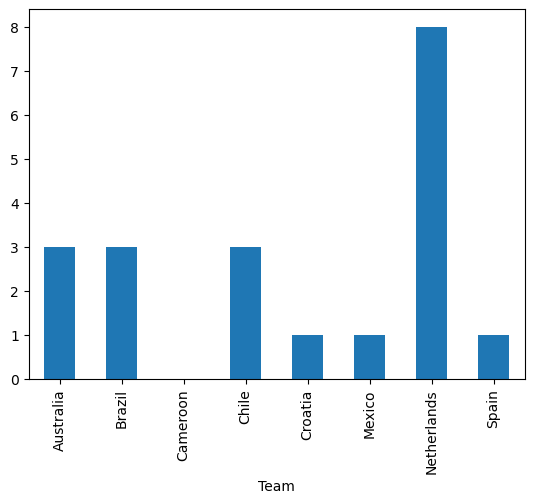

In [32]:
tore_pro_team.plot.bar()

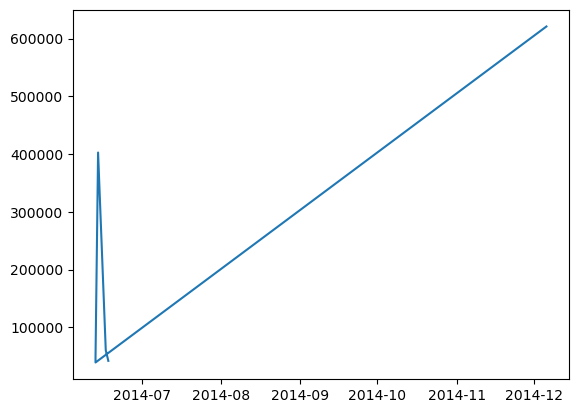

In [33]:
x = df.Date

y = df.Attendance

plt.plot(x,y)

<Axes: ylabel='count'>

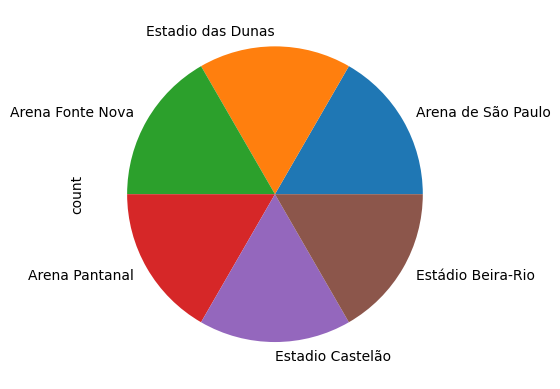

In [ ]:
df["Stadium"].value_counts().plot.pie()


In [39]:
n = df["City"].value_counts()

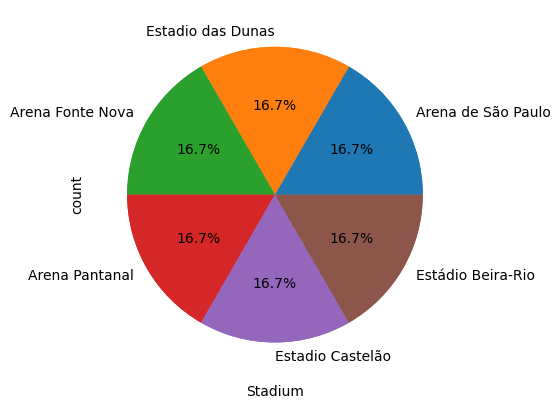

In [40]:
df["Stadium"].value_counts().plot.pie()
plt.xlabel("Stadium")

plt.pie(n, autopct="%1.1f%%", startangle=0)
plt.show()

---
## Bonus (optional)
- Erstelle eine Spalte **`GoalDiff`** (Tordifferenz) und analysiere, ob hohe Zuschauerzahlen mit hoher Tordifferenz korrelieren.
- Erzeuge eine **Heatmap** der Torverteilung nach `Stage` und Team.
- Prüfe Datenqualität mit einer **Kurzübersicht** (fehlende Werte, Duplicates, Typen).

Viel Erfolg! 🚀